# The Sparks Foundation Internship GRIP JUNE 2021

# Task 2 (CV & IOT ) : Color Identification in Images

# By Sachin Sarkar

#### Objective : Implement an image color detector which identifies all the colors in an image or video.

.

Importing Libraries

In [1]:
import cv2

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

Reading and showing the Image 

In [4]:
img = cv2.imread('marine-drive.jpg')

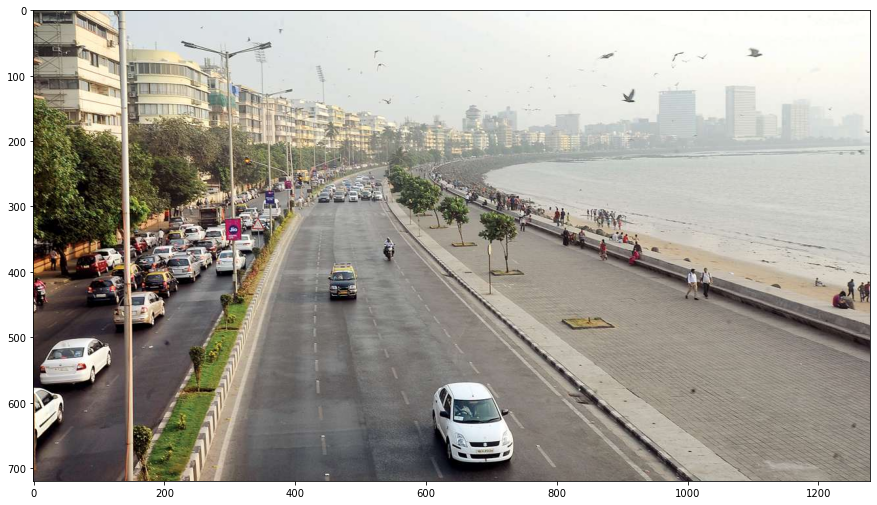

In [5]:
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
clicked = False
r = g = b = x_pos = y_pos = 0

Inserting the Color CSV file

In [7]:
index = ['color','color_name','hex','R','G','B']

In [8]:
csv = pd.read_csv('colors.csv',names=index,header=None)

In [9]:
csv.head()

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


Defining get_color_names and draw_function methods

In [10]:
def get_color_names(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i,'R'])) + abs(G - int(csv.loc[i,'G'])) + abs(B - int(csv.loc[i,'B']))
        if d <= minimum :
            minimum = d
            cname =  csv.loc[i,'color_name']
    return cname

In [11]:
def draw_function(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b, g, r, x_pos, y_pos, clicked
        clicked = True
        x_pos = x
        y_pos = y
        b, g, r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

In [12]:
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_function)

Final implementation for color identification for on that image

In [ ]:
while True:
    cv2.imshow('image',img)
    if clicked: 
        cv2.rectangle(img,(20,20),(750,60),(b,g,r),-1)
        text = get_color_names(r,g,b) + ' R = ' + str(r) + ' G = ' + str(g) + ' B = ' + str(b)
        cv2.putText(img,text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)
        
        if r + b + g >= 600:
            cv2.putText(img,text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
        
        clicked = False
        
    if cv2.waitKey(20) & 0xFF == 27:
        break
        
cv2.destroyAllWindows()

# Thank You